<a href="https://colab.research.google.com/github/DonguYang/Data-Analysis/blob/circleci-project-setup/%EC%A0%9C%EC%A1%B0%EC%97%85_%EB%8F%84%EB%A9%94%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**⛏ 제조업 도메인 1차 과제**
=======================


* 드라이브 접속 및 데이터 불러오기

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ex1 = pd.read_csv('/content/drive/MyDrive/example_1.csv', sep=";")
ex2 = pd.read_csv('/content/drive/MyDrive/example_2.csv')
ex3 = pd.read_csv('/content/drive/MyDrive/example_3.csv')


In [8]:
ex1.head()

,datetime,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
0,2020-03-09 16:16:30,0.027545,0.041127,0.673506,0.054711,67.8345,24.3164,240.513,32.0,0.0,0.0
1,2020-03-09 16:16:31,0.027997,0.039100,0.772264,0.054711,67.8704,24.3279,229.523,32.0,0.0,0.0
2,2020-03-09 16:16:32,0.028418,0.038872,0.675520,0.054711,67.7882,24.3261,242.708,32.0,0.0,0.0
3,2020-03-09 16:16:33,0.027625,0.039366,0.566279,-0.273216,67.7918,24.3323,229.709,32.0,0.0,0.0
4,2020-03-09 16:16:34,0.027484,0.041854,1.292170,0.054711,67.7368,24.3250,242.746,32.0,0.0,0.0


### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [9]:
# (1)

ex1.shape

(1063, 11)

In [10]:
# (2)
ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             1063 non-null   object 
 1   Accelerometer1RMS    1063 non-null   float64
 2   Accelerometer2RMS    1063 non-null   float64
 3   Current              1063 non-null   float64
 4   Pressure             1063 non-null   float64
 5   Temperature          1063 non-null   float64
 6   Thermocouple         1063 non-null   float64
 7   Voltage              1063 non-null   float64
 8   Volume Flow RateRMS  1063 non-null   float64
 9   anomaly              1063 non-null   float64
 10  changepoint          1063 non-null   float64
dtypes: float64(10), object(1)
memory usage: 91.5+ KB


In [11]:
# (3)
print(ex1.isna().sum())

datetime               0
Accelerometer1RMS      0
Accelerometer2RMS      0
Current                0
Pressure               0
Temperature            0
Thermocouple           0
Voltage                0
Volume Flow RateRMS    0
anomaly                0
changepoint            0
dtype: int64


### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 시각화를 진행하시오.

  (1) 전체 데이터의 개수에서 'anomaly'가 차지하는 비율은?
  
  (2) 'Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS'
  총 8개의 Column 대상으로 총 8개의 Trend 그래프를 시각화 하시오.
  (※ x = 'datetime', y= 각 Column)

  (3) 시각화만 Trend 그래프 위에 'anomaly'가 1인 데이터에 대해서 이상 포인트를 표시하시오.
  (※ Trend 그래프에서 이상 Point를 구별할 수 있는 방법이라면 자유롭게 표현 가능)

```

In [12]:
# (1)
round(ex1.anomaly.sum()/len(ex1) *100,3).astype('str') + '%'

'31.326%'

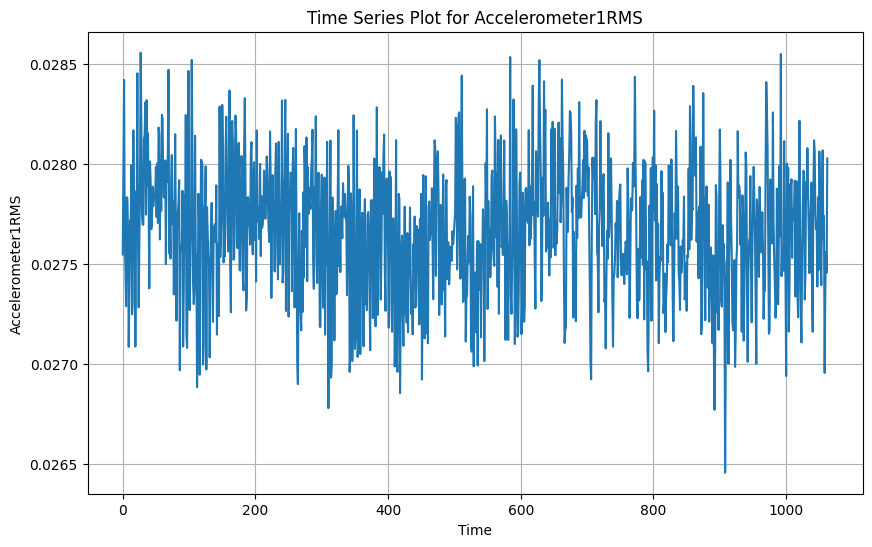

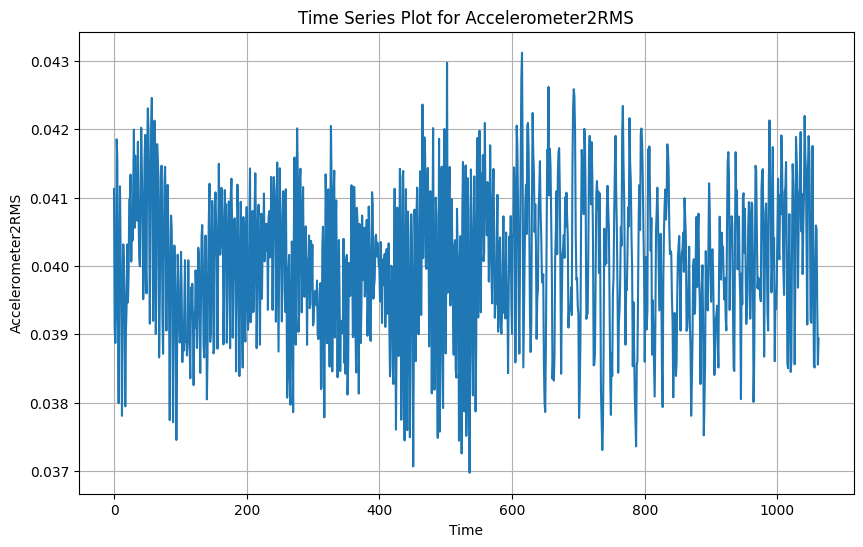

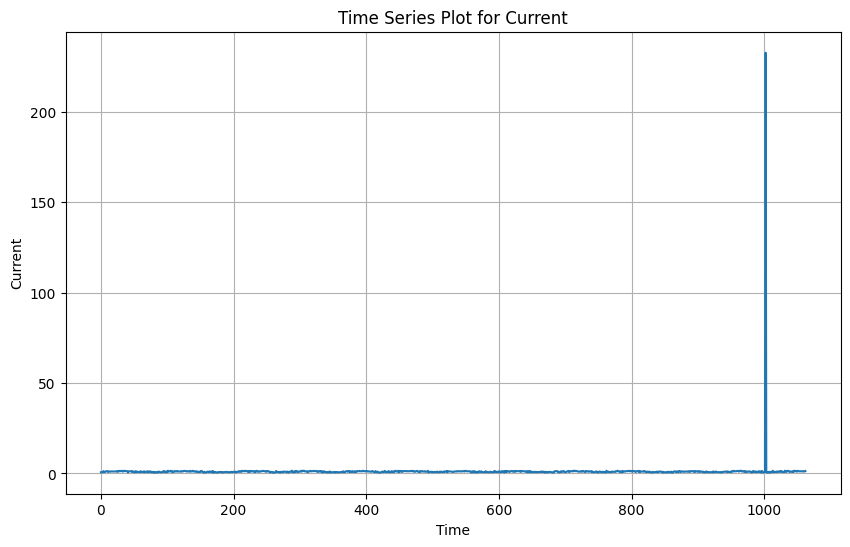

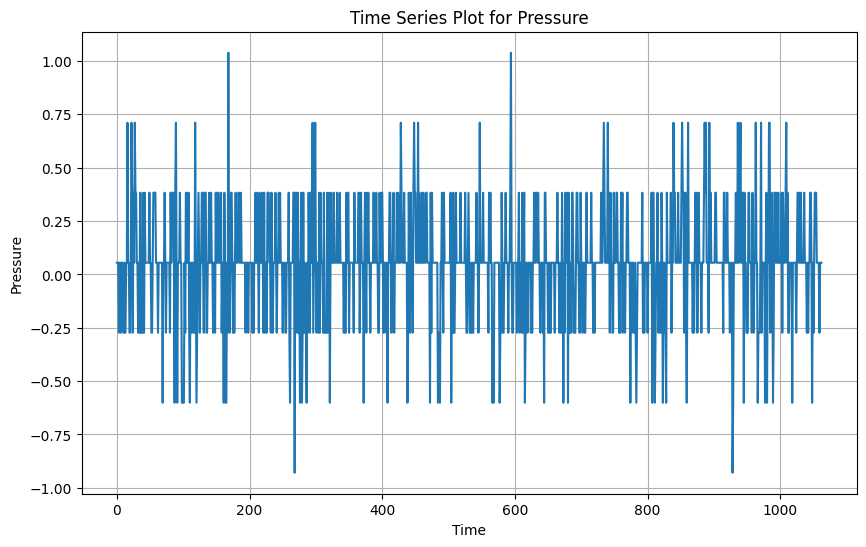

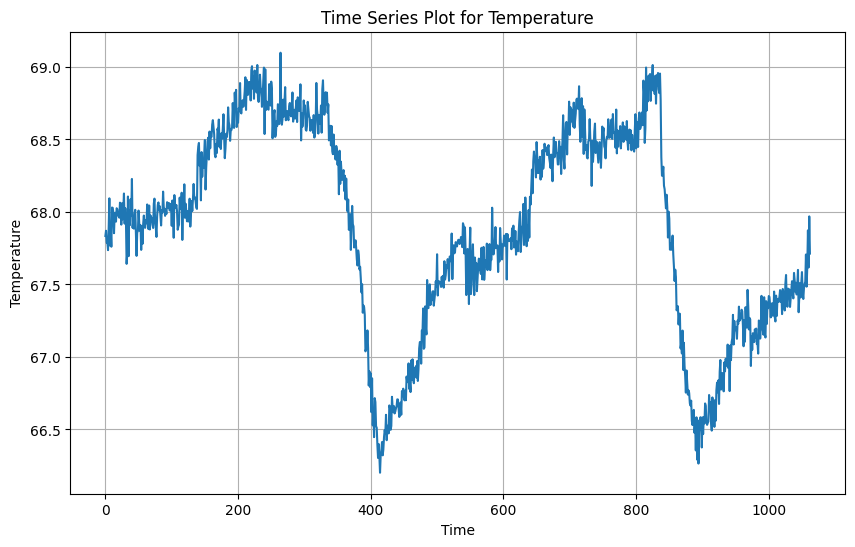

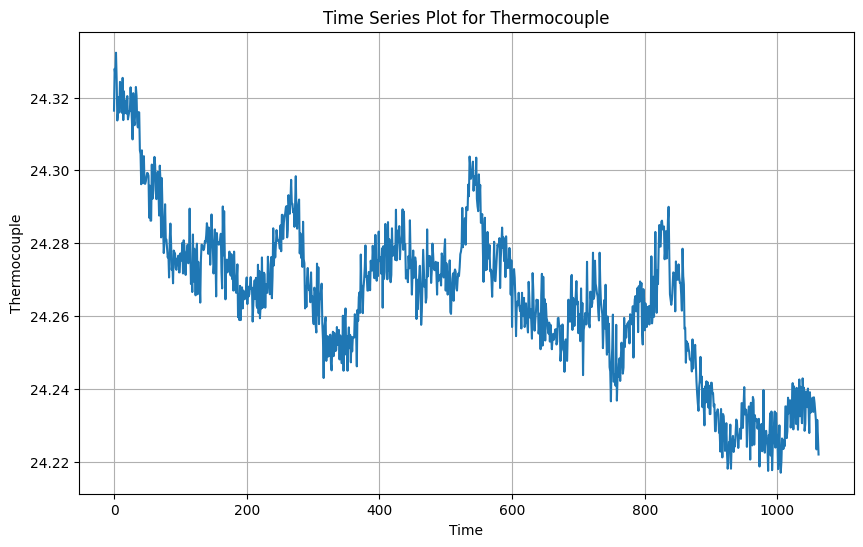

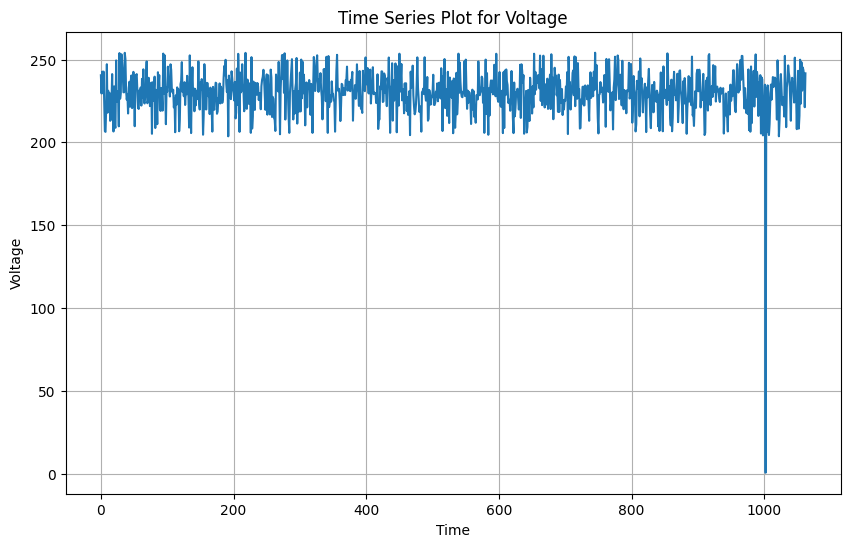

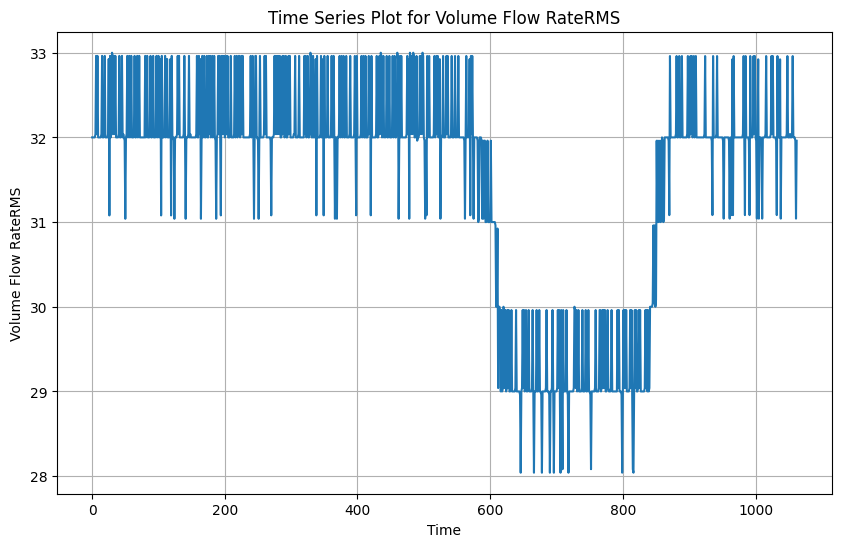

In [13]:
# (2)


col = ['Accelerometer1RMS','Accelerometer2RMS','Current','Pressure','Temperature','Thermocouple','Voltage','Volume Flow RateRMS']

# 각 컬럼에 대한 시각화
for column in col:
    plt.figure(figsize=(10, 6))
    plt.plot(ex1.index, ex1[column])
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


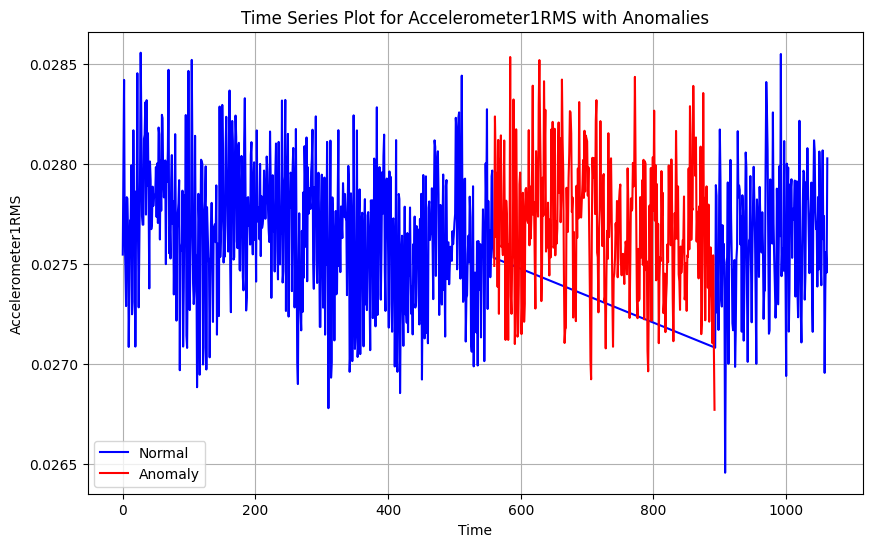

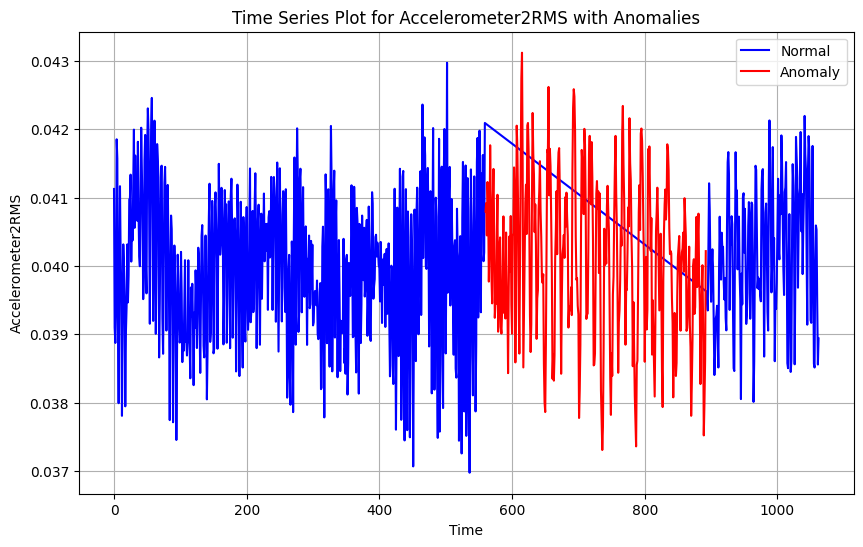

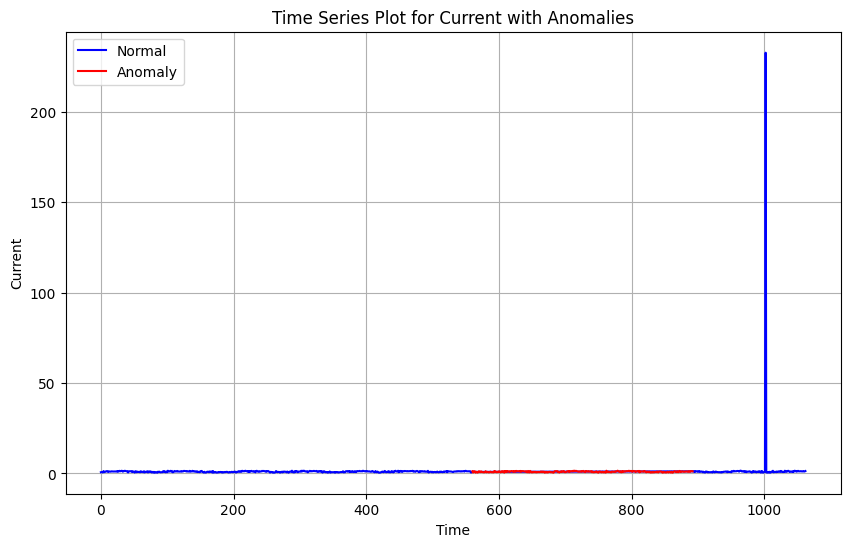

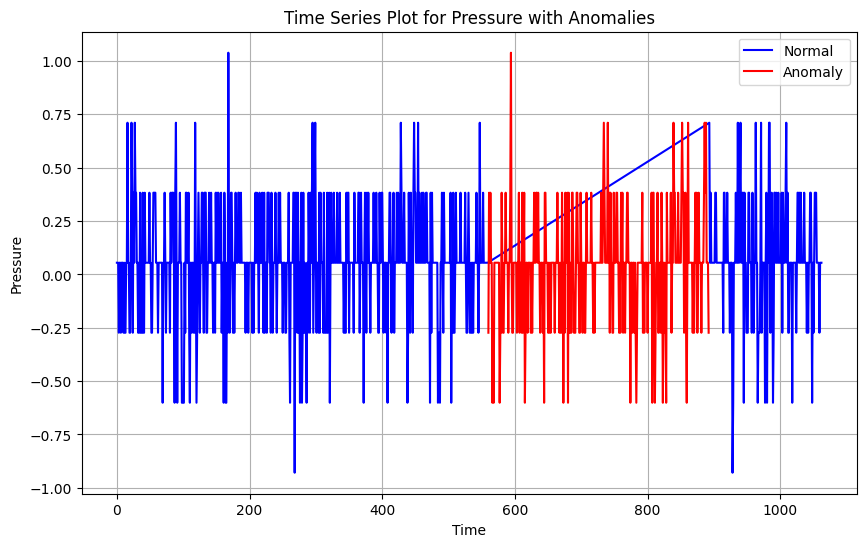

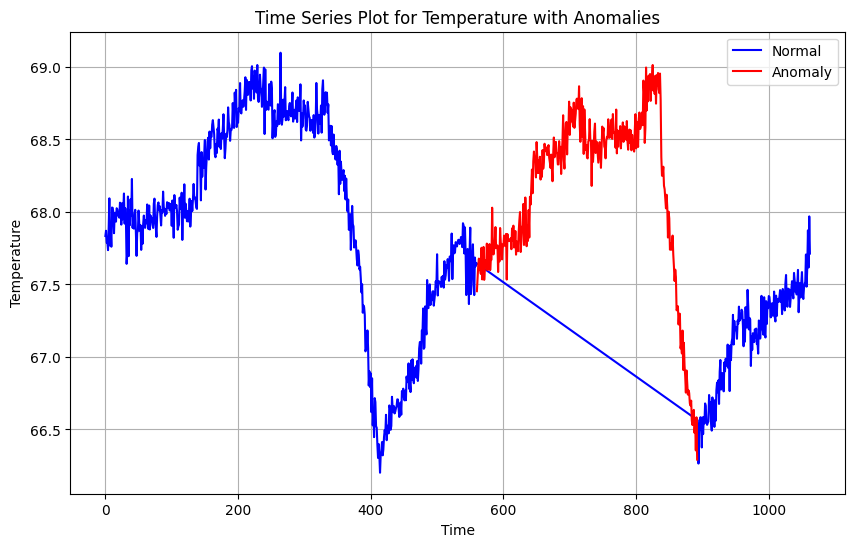

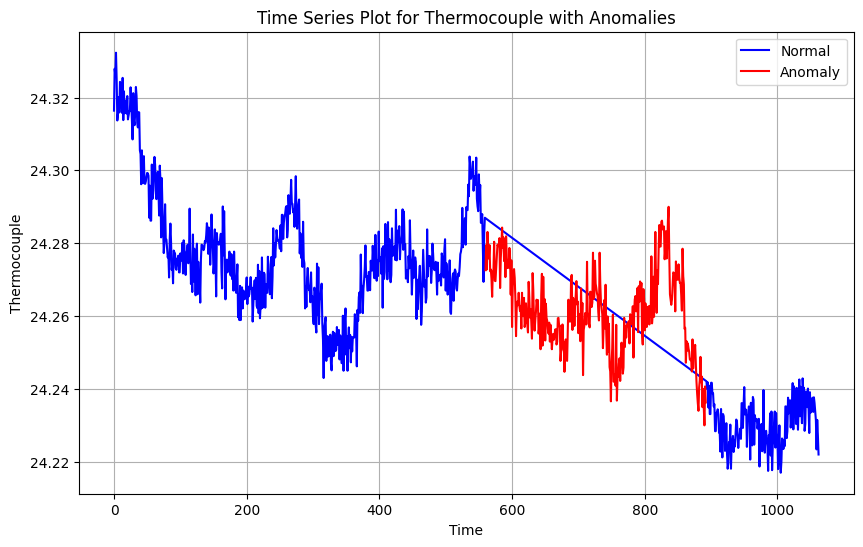

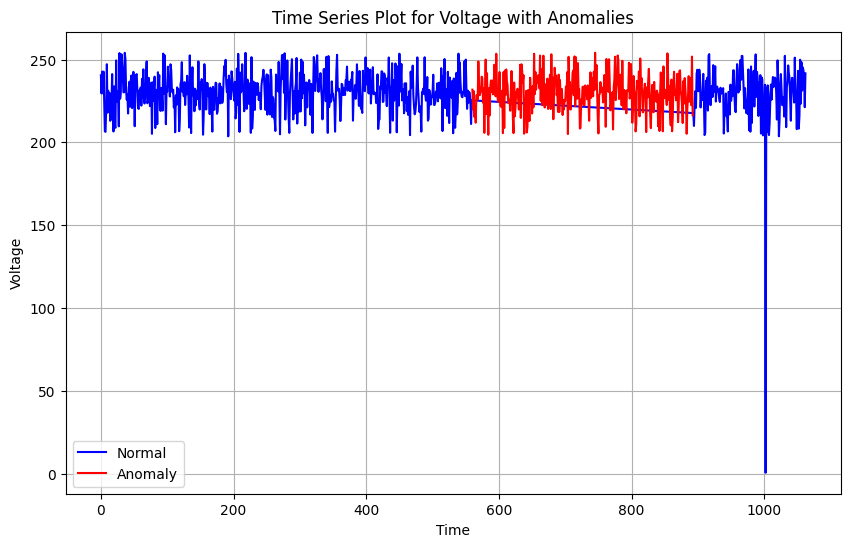

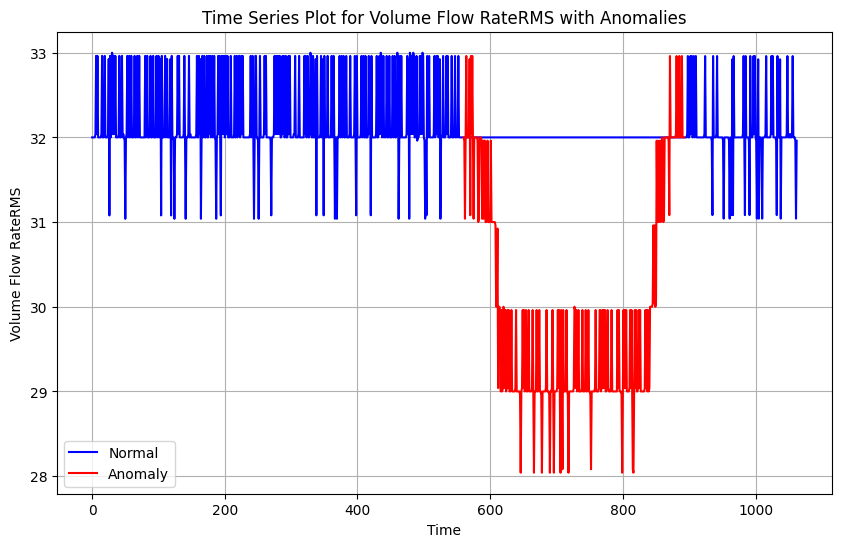

In [14]:
# (3)
anomaly_indices = ex1[ex1['anomaly'] == 1].index
normal_indices = ex1[ex1['anomaly'] == 0].index

# 각 컬럼에 대한 시각화
for column in col:
    plt.figure(figsize=(10, 6))

    # 'ANOMALY' 컬럼 값이 0인 부분을 파란색으로 플로팅합니다.
    plt.plot(ex1.loc[normal_indices, column], label='Normal', color='blue')

    # 'ANOMALY' 컬럼 값이 1인 부분을 빨간색으로 플로팅합니다.
    plt.plot(ex1.loc[anomaly_indices, column], label='Anomaly', color='red')

    plt.title(f'Time Series Plot for {column} with Anomalies')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


### Question 03

```
'anomaly가 1인 이상 데이터와 정상 데이터의 다른 특성들이 어떤 것들이 있는지 자유롭게 추가 EDA를 진행하시오.

```

Time이 600~800을 지나가는 구간에 공통적으로 abnomaly 가 나타난다.

In [15]:
# timedl 600~800인 구간에 공통적으로 나타남.

### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

In [16]:
# (1)
ex2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
ex2.shape

(6362620, 11)

In [18]:
# (2)
ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [19]:
# (3)
ex2.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Question 02

```
01번 문제에서 Read한 데이터를 활용하여, 다음 지표들을 추출하시오.

  (1) 'isFraud' Column을 활용하여, 전체 사기율(%)을 계산하시오.

  (2) 'type'에 따른 사기율(%)을 계산하시오.

  (3) 사기거래와 사기거래가 아닌 거래의 amount의 분포를 비교하시오.
  (※ isFraud가 1인 데이터 1000개를 Sampling하고 isFraud가 0인 데이터를 1000개를 Sampling하여 시각화 할 것)

```

In [20]:
# (1) 전체 사기율
round(8213/(6354407+8213)*100,3)

0.129

In [21]:
ex2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
# (2) 거래 종류별 사기
round((ex2.groupby('type')['isFraud'].mean()*100),3).astype(str) + '%'

type
CASH_IN       0.0%
CASH_OUT    0.184%
DEBIT         0.0%
PAYMENT       0.0%
TRANSFER    0.769%
Name: isFraud, dtype: object

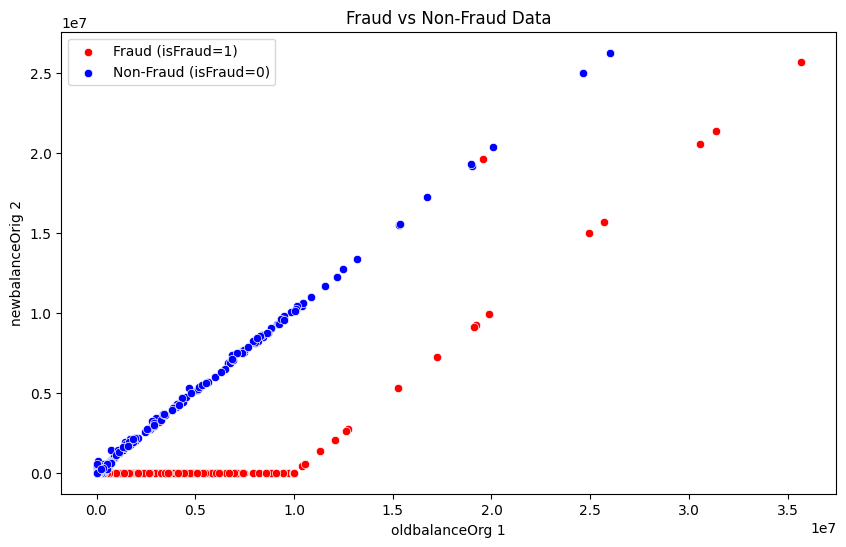

In [23]:
# (3)

# isFraud가 1인 데이터 1000개 샘플링
fraud_sample = ex2[ex2['isFraud'] == 1].sample(n=1000, random_state=42)

# isFraud가 0인 데이터 1000개 샘플링
non_sample = ex2[ex2['isFraud'] == 0].sample(n=1000, random_state=42)

# 시각화
plt.figure(figsize=(10, 6))

# isFraud가 1인 데이터를 빨간색으로 표시
sns.scatterplot(x=fraud_sample['oldbalanceOrg'], y=fraud_sample['newbalanceOrig'], color='red', label='Fraud (isFraud=1)')

# isFraud가 0인 데이터를 파란색으로 표시
sns.scatterplot(x=non_sample['oldbalanceOrg'], y=non_sample['newbalanceOrig'], color='blue', label='Non-Fraud (isFraud=0)')

plt.title('Fraud vs Non-Fraud Data')
plt.xlabel('oldbalanceOrg 1')
plt.ylabel('newbalanceOrig 2')
plt.legend()
plt.show()


### Question 03

```
사기거래와 정상거래의 특성을 자유롭게 추가 EDA분석 하시오.
```


In [24]:
ex2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:

ex2['abs_diff'] = abs(ex2['oldbalanceOrg'] - ex2['newbalanceOrig'])

ex2['is_equal'] = ex2['abs_diff'] == ex2['amount']

count_equal = ex2['is_equal'].sum()

# Display the count
print(f'거래량과 전후 잔액의 차이의 동일 비율 : {round(count_equal/len(ex2),3)}')


거래량과 전후 잔액의 차이의 동일 비율 : 0.146


In [26]:
count_equal/len(ex2)

0.14602396497040526

* 'step' 변수를 활용하여 시간/일별 분포를 살펴보기

In [27]:
# '시간' , '일' 변수 만들기
ex2['time'] = ex2['step']%24
ex2['day'] = ex2['step']//24

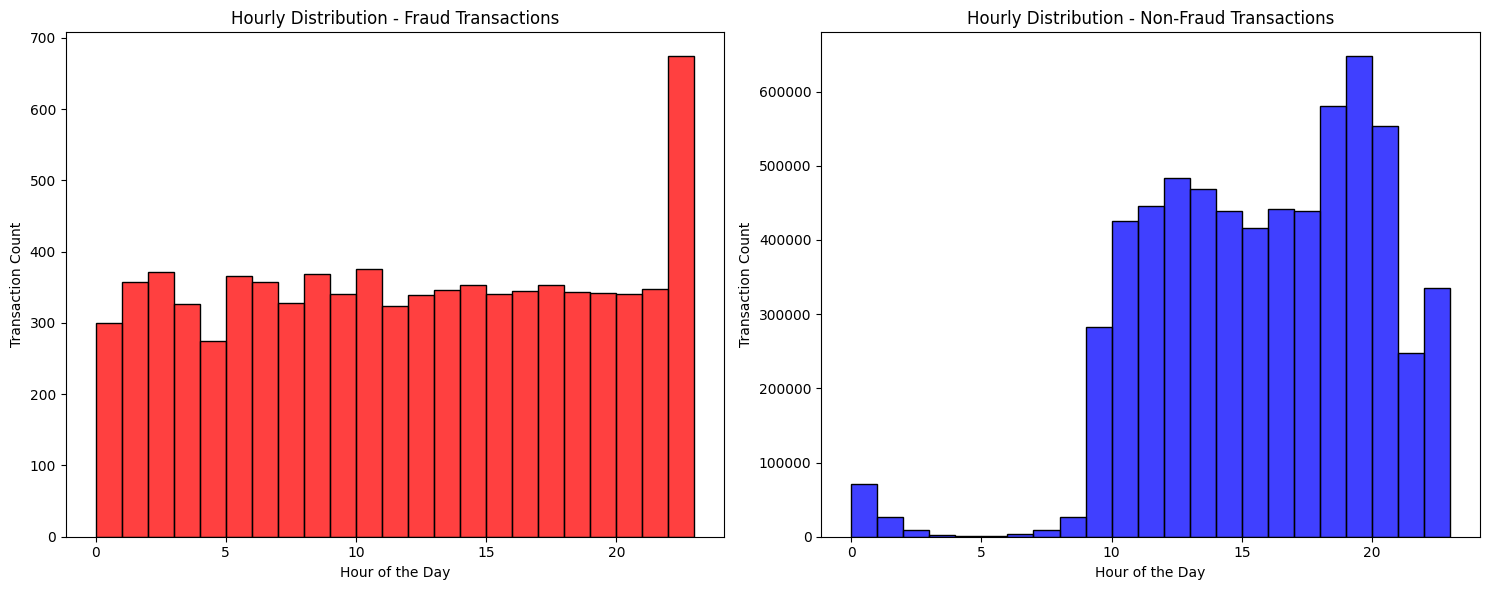

In [52]:
# 시간별 분포

# Fraud
fraud_data = ex2[ex2['isFraud'] == 1]

# Non-Fraud
non_fraud_data = ex2[ex2['isFraud'] == 0]

# Create subplots
plt.figure(figsize=(15, 6))

# Plot for Fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(fraud_data['time'], bins=np.arange(0, 24, 1), color='red', kde=False)
plt.title('Fraud')
plt.xlabel('Hour')
plt.ylabel('Count')

# Plot for Non-Fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(non_fraud_data['time'], bins=np.arange(0, 24, 1), color='blue', kde=False)
plt.title('Non-Fraud')
plt.xlabel('Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


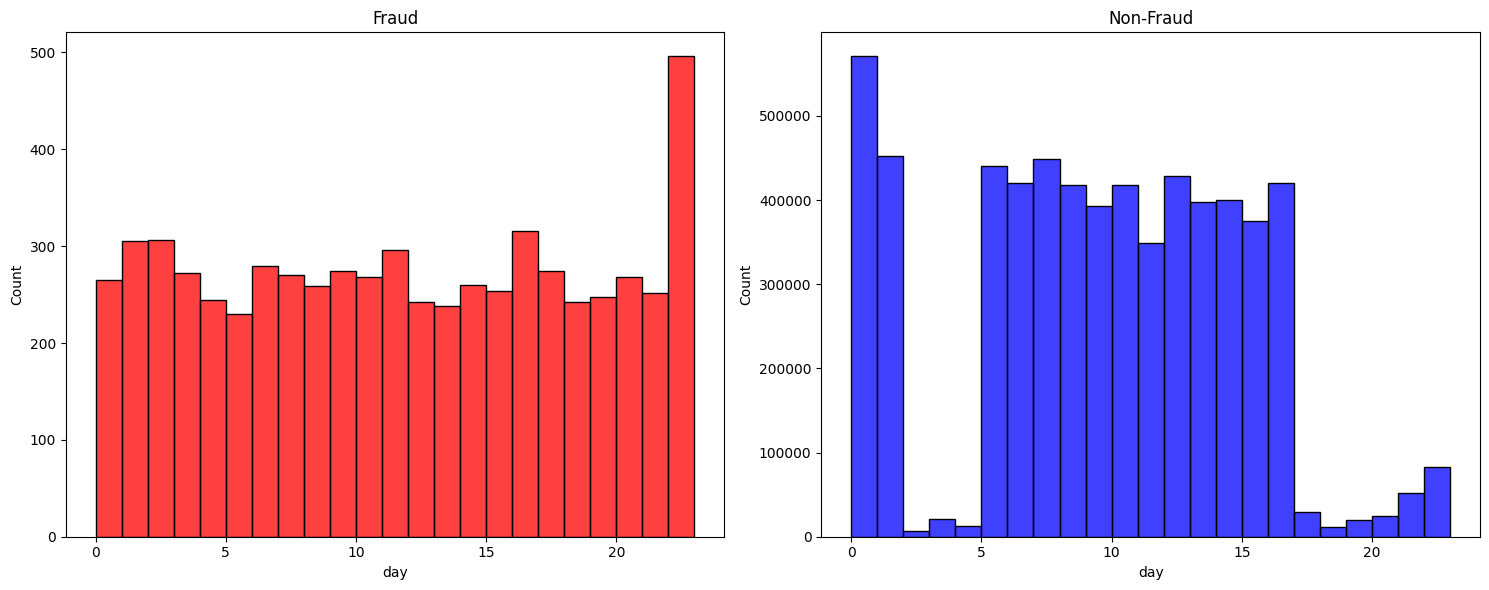

In [53]:
# 일별 분포

# Fraud
fraud_data = ex2[ex2['isFraud'] == 1]

# Non-Fraud
non_fraud_data = ex2[ex2['isFraud'] == 0]

# Create subplots
plt.figure(figsize=(15, 6))

# Plot for Fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(fraud_data['day'], bins=np.arange(0, 24, 1), color='red', kde=False)
plt.title('Fraud')
plt.xlabel('day')
plt.ylabel('Count')

# Plot for Non-Fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(non_fraud_data['day'], bins=np.arange(0, 24, 1), color='blue', kde=False)
plt.title('Non-Fraud')
plt.xlabel('day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


* 잔고의 전액을 꺼낸 경우 사기거래일 가능성이 높을 것이다

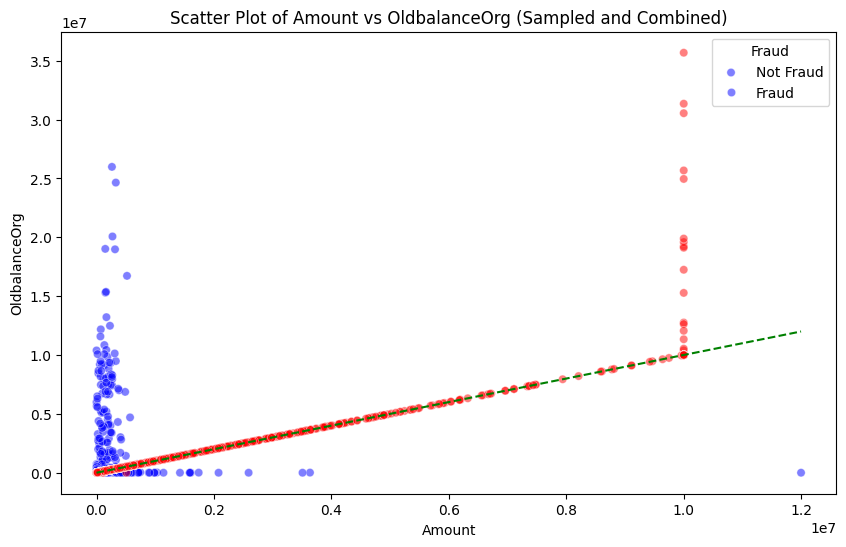

In [54]:


# Fraud가 아닌 거래 1000개 샘플링
non_fraud_samples = ex2[ex2['isFraud'] == 0].sample(n=1000, random_state=42)

# Fraud인 거래 1000개 샘플링
fraud_samples = ex2[ex2['isFraud'] == 1].sample(n=1000, random_state=42)

# 두 데이터프레임 합치기
combined_samples = pd.concat([non_fraud_samples, fraud_samples])

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amount', y='oldbalanceOrg', hue='isFraud', data=combined_samples, palette={0: 'blue', 1: 'red'}, alpha=0.5)

# y=x의 선 그리기
plt.plot([min(combined_samples['amount']), max(combined_samples['amount'])], [min(combined_samples['amount']), max(combined_samples['amount'])], linestyle='--', color='green')

# 그래프 꾸미기
plt.title('Scatter Plot of Amount vs OldbalanceOrg (Sampled and Combined)')
plt.xlabel('Amount')
plt.ylabel('OldbalanceOrg')
plt.legend(title='Fraud', labels=['Not Fraud', 'Fraud'])
plt.show()



* 전액을 뽑으려는 시도들이 높은 확률로 사기 거래이다.

### Question 01

```
Data Read하고 상위 전처리 조건을 적용한 DataFrame을 만드시오.

  (1) Data shape(형태) 출력 → 전체 데이터의 Row와 Column개수 출력

  (2) Data type 확인 → 각 Column별 Data Type 출력

  (3) Null값 확인 (※ 빈 값의 Data) → 각 Column별 Null Value의 개수 출력
```

### Question 02

```
다음 가설들을 데이터 분석을 통해 검증하시오.

[가설]
Without moving & WeaponsAcquired - analyze
 : 이동 없이 무기를 획득한 버그 유저가 존재할까?

  (1) _totalDistance가 하위 10%인 Data set을 만드시오.
  (※ '_totalDistance' = 'rideDistance' + 'walkDistance' + 'swimDistance')

  (2) 1번에서 만든 Data set에서 weaponsAcquired가 상위 1%인 버그의심 유저 수를 출력하시오.

```

In [57]:
ex3 = ex3.iloc[:,1:]

In [74]:

ex3['_totalDistance'] = ex3['rideDistance'] + ex3['walkDistance'] + ex3['swimDistance']

# '_totalDistance'의 하위 10% 계산
lower_10_percent_threshold = np.percentile(ex3['_totalDistance'], 10)
lower_10_percent_data = ex3[ex3['_totalDistance'] < lower_10_percent_threshold]

# '_totalDistance' 하위 10% 중 'weaponsAcquired' 상위 1% 찾기
weapons_acquired_threshold = np.percentile(lower_10_percent_data['weaponsAcquired'], 99)
bug_suspect_users = lower_10_percent_data[lower_10_percent_data['weaponsAcquired'] > weapons_acquired_threshold]
bug_suspect_user_count = bug_suspect_users['Id'].shape[0]

print(f"상위 1%인 유저 수: {bug_suspect_user_count}")


상위 1%인 유저 수: 5275


### Question 03

```
상위 가설 이외에 주어진 데이터를 활용하여 다른 Action을 하는 버그 유저들을 식별하시오.
```

In [58]:
ex3.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


# 가설1

"*헤드샷 비율이 높은 유저들은 버그 유저들이다*"


In [65]:
high_headshot = ex3[ex3['headshotKills'] / ex3['kills'] > 0.95]
headshot_per = str(round((high_headshot.shape[0]/ex3.shape[0])*100,3))

print(f'헤드샷 킬 비율이 95%를 넘어가는 유저의 비율은 {headshot_per}%')


헤드샷 킬 비율이 95%를 넘어가는 유저의 비율은 6.126%


* 99%가 넘어가는 사람이 6%가 넘어간다. 이 유저들이 모두 버그 유저들이라면 버그 유저의 비율이 너무 높은 것으로, 헤드샷 비율만 가지고 버그 유저를 찾기 어렵다고 판단했다.
* 관련하여 승률, 킬 수가 평균에 비해 높은 유저들만 뽑을 필요가 있을 것 같다.

In [72]:

kill_top10 = ex3['kills'].quantile(0.9)

kill_top10_user = ex3[ex3['kills'] > kill_top10]

headshotbug = kill_top10_user[kill_top10_user['headshotKills'] / kill_top10_user['kills'] > 0.95]

headshot_per = str(round((headshotbug.shape[0]/ex3.shape[0])*100,3))

print(f'헤드샷 킬 비율이 95%를 넘어가는 유저의 비율은 {headshot_per}%')

헤드샷 킬 비율이 95%를 넘어가는 유저의 비율은 0.03%


* 상위 10%의 킬 수는 3킬로, 3킬 이상한 유저 중 헤드샷 비율이 높은 유저는 0.03%로 버그 유저로 의심해 볼 수 있다.

* 이들의 longest_kill의 분포를 살펴보자.

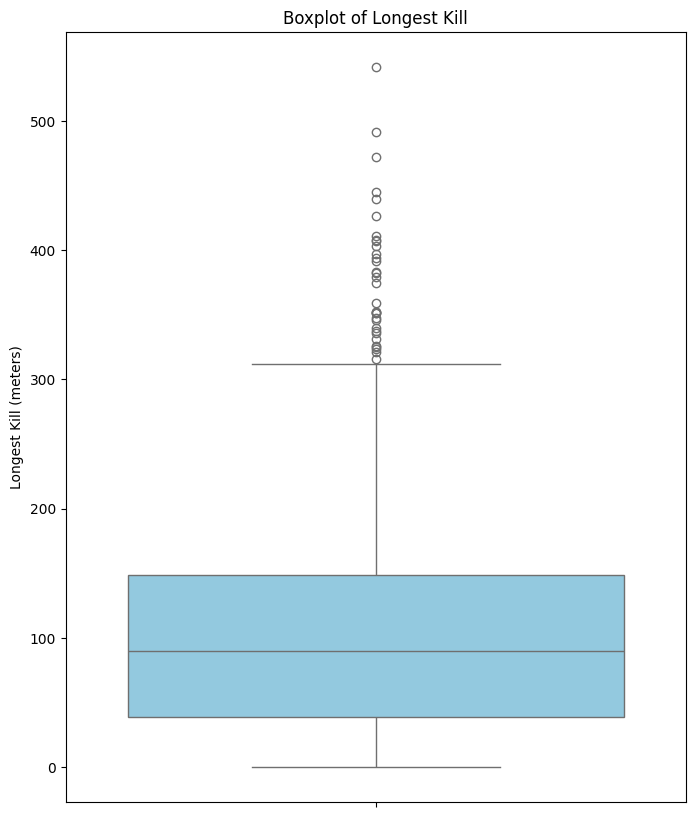

In [73]:
plt.figure(figsize=(8, 10))
sns.boxplot(y=headshotbug['longestKill'], color='skyblue')

plt.title('Longest Kill')
plt.ylabel('meters')

plt.show()


* 300미터 이상거리에서 킬을 한 유저들부터 이상치인데, 구글링해본 결과, 200미터만 넘어가도 버그 유저로 의심을 받는다.  장거리에서 헤드샷으로 킬을 하는 것이 매우 난이도가 어려운 것으로 보여 버그 유저로 의심된다.



# 가설2

"*무기를 얻은 횟수가 적은데 킬이 많으면 버그 유저일 것이다*"

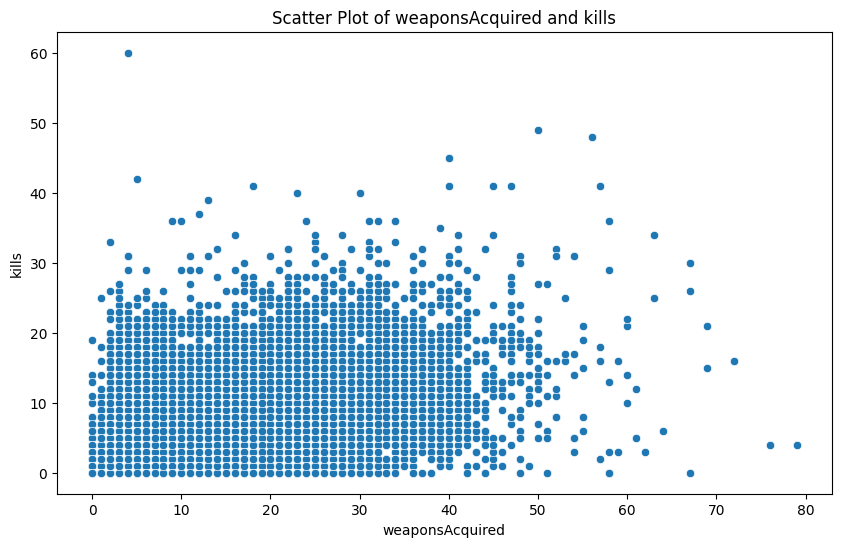

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='weaponsAcquired', y='kills', data=ex3)
plt.title('Scatter Plot of weaponsAcquired and kills')
plt.xlabel('weaponsAcquired')
plt.ylabel('kills')
plt.show()


이상한 점이 매우 많다.

1. 무기를 수십 번 얻은 경우가 많다.(게임에 대한 이해도 부족으로 잘 모르겠음)
2. 무기를 얻은 횟수가 0인데 킬이 많은 유저들
3. 킬이 20이 넘어가는 것이 가능한가?

In [79]:
weapon0_bug = ex3[ex3['weaponsAcquired']<= 1]

weapon0_bug[weapon0_bug['kills'] > 3].shape[0]

3621

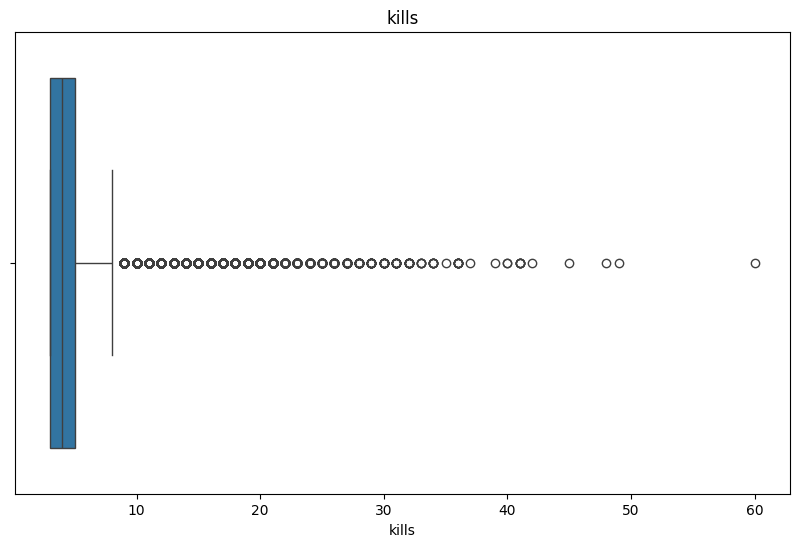

이상치에 해당하는 kill : 8.0
이상치 데이터의 비율: 0.49%


In [90]:
kill_ex3 = ex3[ex3['kills'] >= 3]
# 상위 10%의 킬 값

plt.figure(figsize=(10, 6))
sns.boxplot(x='kills', data=kill_ex3)
plt.title('kills')
plt.show()

# 이상치 데이터의 비율 계산
Q1 = kill_ex3['kills'].quantile(0.25)
Q3 = kill_ex3['kills'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold3 = Q3 + 1.5 * IQR
outliers = kill_ex3[kill_ex3['kills'] > outlier_threshold3]

outlier_ratio = outliers.shape[0] / ex3.shape[0] * 100
print(f'이상치에 해당하는 kill : {outlier_threshold3}')
print(f'이상치 데이터의 비율: {outlier_ratio:.2f}%')


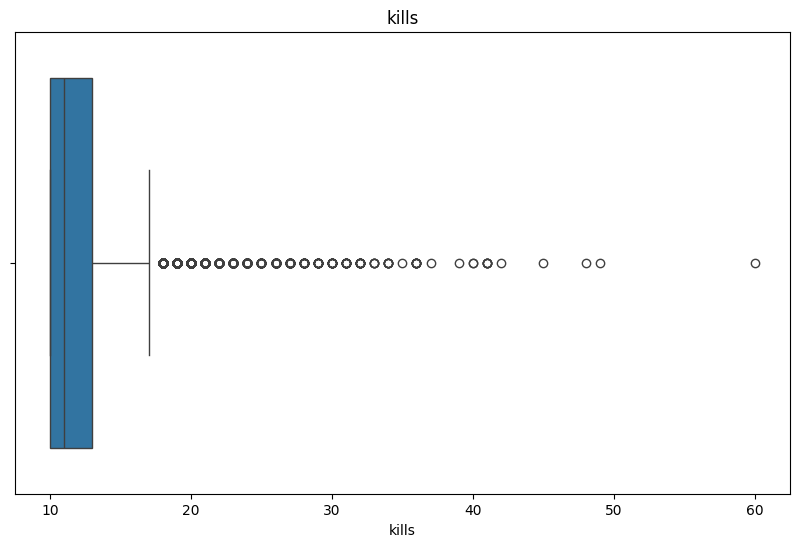

이상치에 해당하는 kill : 17.5
이상치 데이터의 비율: 0.02%


In [89]:
kill_ex3 = ex3[ex3['kills'] >= 10]
# 상위 10%의 킬 값

plt.figure(figsize=(10, 6))
sns.boxplot(x='kills', data=kill_ex3)
plt.title('kills')
plt.show()

# 이상치 데이터의 비율 계산
Q1 = kill_ex3['kills'].quantile(0.25)
Q3 = kill_ex3['kills'].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold10 = Q3 + 1.5 * IQR
outliers = kill_ex3[kill_ex3['kills'] > outlier_threshold10]

outlier_ratio = outliers.shape[0] / ex3.shape[0] * 100
print(f'이상치에 해당하는 kill : {outlier_threshold10}')
print(f'이상치 데이터의 비율: {outlier_ratio:.2f}%')


kill만으로 어떤 기준이 버그 유저로 볼 수 있는지 알기 어렵다.(게임에 대한 지식 미비)

하지만 **얻은 무기 없이 상위 10%의 킬 이상을 달성한 유저** 들이 있다면 버그 유저로 충분히 의심할 수 있다.

In [95]:
weapon_bug = ex3[(ex3['weaponsAcquired'] ==0 ) & (ex3['kills'] > 3)]

weapon_bug_per = round(weapon_bug.shape[0]/ex3.shape[0]*100,3)

print(f'맨손 버그 추정 유저의 숫자 : {weapon_bug.shape[0]} \n 비율 : {weapon_bug_per}%')

맨손 버그 추정 유저의 숫자 : 99 
 비율 : 0.002%


# 가설3

"*이동 수단 이용 비율이 높은 유저들은 이동 수단 이용 버그 유저일 것이다*"

In [105]:
ex3['distance'] = ex3['rideDistance'] + ex3['walkDistance'] + ex3['swimDistance']

ex3['ride_distance_ratio'] = ex3['rideDistance'] / ex3['distance']

kills10_ride_ratio = round(ex3[(ex3['rideDistance'] > 0) & (ex3['kills'] >= 3)]['ride_distance_ratio'].mean()*100,3)
ride_ratio = round(ex3[(ex3['rideDistance'] > 0) ]['ride_distance_ratio'].mean()*100,3)

print(f'탈 것을 이용한 유저들의 이동 거리 대비 탈 것 이동거리 비율 : {ride_ratio}% \n 탈 것 이용자들 중 상위 10% 킬을 한 유저의 이동거리 비율 : {kills10_ride_ratio}%')

탈 것을 이용한 유저들의 이동 거리 대비 탈 것 이동거리 비율 : 44.238% 
 탈 것 이용자들 중 상위 10% 킬을 한 유저의 이동거리 비율 : 39.667%


In [106]:
best_ride_ratio = round(ex3[(ex3['rideDistance'] > 0) & (ex3['kills'] >= 10)]['ride_distance_ratio'].mean()*100,3)
print(f'탈 것 이용 유저 중 최상위 킬 기록을 기록한 유저의 비율 : {best_ride_ratio}%')

탈 것 이용 유저 중 최상위 킬 기록을 기록한 유저의 비율 : 38.891%


* 위 결과를 보면 상위 유저들은 탈 것을 이용하더라도 이용한 비율이 낮다. 즉 많은 킬을 기록한 유저라면 오히려 걸어다니는 비율이 높아지게 된다는 것이다.
* 탈 것 이용 비율이 높으면서 상위의 킬 기록을 갖고 있다면 버그 유저일 가능성이 높다.

In [96]:

count_high_ratio_users = ex3[ex3['ride_distance_ratio'] >= 0.95].shape[0]
count_ride_bug = ex3[ex3['ride_distance_ratio'] == 1].shape[0]

print(f"rideDistance / distance 비율이 95% 이상인 유저의 수: {count_high_ratio_users}")
print(f"rideDistance / distance 비율이 100% 이상인 유저의 수: {count_ride_bug}")

# 차 타고 총 잘 안쏘지 않나 해서 100% 95% 이상이면 버그 유저일 듯.


rideDistance / distance 비율이 95% 이상인 유저의 수: 5758
rideDistance / distance 비율이 100% 이상인 유저의 수: 155


* 차를 타고 다니면서 총을 쏘는건 쉽지 않을테니 비율이 높은데 kill숫자가 상위 10%의값(3)이 넘는다면 버그 유저로 의심 할만하다.

In [100]:
ride100 = ex3[ex3['ride_distance_ratio'] == 1]

ride100[(ride100['kills'] >= 3)][['roadKills','kills']]

,roadKills,kills
183774,0,4
387240,0,8
673959,0,4


* 탈 것을 이용한 비율이 100%면서 roadkills가 0고 kills 도 높은 숫자를 기록하고 있다.
